### 5.  risk_factorhttps://www.kaggle.com/datasets/mamta1999/cardiovascular-risk-data

In [ ]:
1. age可以使用極值正規化或z-score
2. cigs可以使用極值正規化

In [ ]:
import pandas as pd
risk_factor = pd.read_csv("5.data_cardiovascular_risk.csv")
risk_factor.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


### 第一次KNN程式碼(前處理方式：age前處理使用z-score，cigs使用極值正規化，其他欄位資料離散型態轉換)

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Turning_KNN.best_params_ =  {'n_neighbors': 29}
Turning_KNN.score =  0.8451327433628318
knn_model.score =  0.8451327433628318
precision_score= 0.0
recall_score= 0.0
f1_score= 0.0
--------------------------------------------------


D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


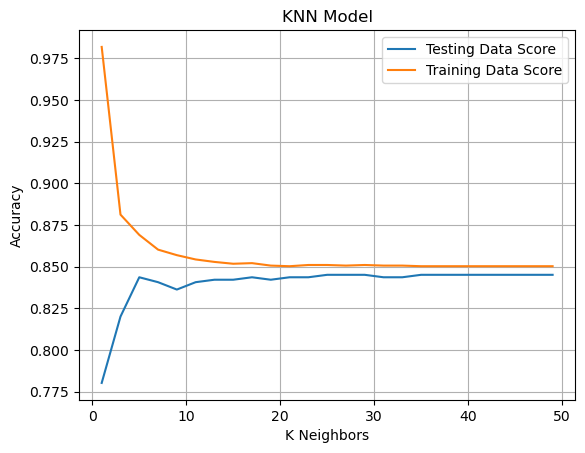

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

risk_factor = pd.read_csv("5.data_cardiovascular_risk.csv")
# print(risk_factor.head(10))
# print(risk_factor.tail(10))

# #資料簡介
# print(risk_factor.shape)
# print(risk_factor.info())


# #每個欄位字串空值的索引值位置判斷，皆沒有
# print("id:",risk_factor["id"][risk_factor["id"]==""].index)
# print("age:",risk_factor["age"][risk_factor["age"]==""].index)
# print("education:",risk_factor["education"][risk_factor["education"]==""].index)
# print("sex:",risk_factor["sex"][risk_factor["sex"]==""].index)
# print("is_smoking:",risk_factor["is_smoking"][risk_factor["is_smoking"]==""].index)
# print("cigsPerDay:",risk_factor["cigsPerDay"][risk_factor["cigsPerDay"]==""].index)
# print("BPMeds:",risk_factor["BPMeds"][risk_factor["BPMeds"]==""].index)
# print("prevalentStroke:",risk_factor["prevalentStroke"][risk_factor["prevalentStroke"]==""].index)
# print("prevalentHyp:",risk_factor["prevalentHyp"][risk_factor["prevalentHyp"]==""].index)
# print("diabetes:",risk_factor["diabetes"][risk_factor["diabetes"]==""].index)
# print("totChol:",risk_factor["totChol"][risk_factor["totChol"]==""].index)
# print("sysBP:",risk_factor["sysBP"][risk_factor["sysBP"]==""].index)
# print("diaBP:",risk_factor["diaBP"][risk_factor["diaBP"]==""].index)
# print("BMI:",risk_factor["BMI"][risk_factor["BMI"]==""].index)
# print("heartRate:",risk_factor["heartRate"][risk_factor["heartRate"]==""].index)
# print("glucose:",risk_factor["glucose"][risk_factor["glucose"]==""].index)
# print("TenYearCHD:",risk_factor["TenYearCHD"][risk_factor["TenYearCHD"]==""].index)

# #查看後有空值欄位的空值索引值位置判斷
# print("education:",risk_factor["education"][risk_factor["education"].isna()].index,sep="\n")
# print("cigsPerDay:",risk_factor["cigsPerDay"][risk_factor["cigsPerDay"].isna()].index,sep="\n")
# print("BPMeds:",risk_factor["BPMeds"][risk_factor["BPMeds"].isna()].index,sep="\n")
# print("totChol:",risk_factor["totChol"][risk_factor["totChol"].isna()].index,sep="\n")
# print("BMI:",risk_factor["BMI"][risk_factor["BMI"].isna()].index,sep="\n")
# print("heartRate:",risk_factor["heartRate"][risk_factor["heartRate"].isna()].index,sep="\n")
# print("glucose:",risk_factor["glucose"][risk_factor["glucose"].isna()].index,sep="\n")

# #各欄位的空值筆數判斷
# print("各欄位的空值筆數判斷",risk_factor.isna().sum())

# #查看相異值：dtype=object(是否有文字和數值同時存在或者單純只有文字)或dtype=float(是否有Nan存在，或是只有浮點數)
# #所有型態(object, float, int)都可以看有沒有雜訊(包含錯誤值、離群值)
# print("id:",risk_factor["id"].unique(),sep="\n") #[   0    1    2 ... 3387 3388 3389]
# print("age:",np.sort(risk_factor["age"].unique()),sep="\n")
# print("education:",np.sort(risk_factor["education"].unique()),sep="\n") #浮點數與nan
# print("sex:",np.sort(risk_factor["sex"].unique()),sep="\n") #['F' 'M']
# print("is_smoking:",np.sort(risk_factor["is_smoking"].unique()),sep="\n") #['YES' 'NO']
# print("cigsPerDay:",np.sort(risk_factor["cigsPerDay"].unique()),sep="\n") #浮點數與nan
# print("BPMeds:",np.sort(risk_factor["BPMeds"].unique()),sep="\n") #[ 0. nan  1.]
# print("prevalentStroke:",risk_factor["prevalentStroke"].unique(),sep="\n") #[0 1]
# print("prevalentHyp:",risk_factor["prevalentHyp"].unique(),sep="\n") #[0 1]
# print("diabetes:",risk_factor["diabetes"].unique(),sep="\n") #[0 1]
# print("totChol:",np.sort(risk_factor["totChol"].unique()),sep="\n") #浮點數與nan
# print("sysBP:",np.sort(risk_factor["sysBP"].unique()),sep="\n") #浮點數
# print("diaBP:",np.sort(risk_factor["diaBP"].unique()),sep="\n") #浮點數
# print("BMI:",list(np.sort(risk_factor["BMI"].unique())),sep="\n") #浮點數與nan
# print("heartRate:",np.sort(risk_factor["heartRate"].unique()),sep="\n") #浮點數與nan
# print("glucose:",np.sort(risk_factor["glucose"].unique()),sep="\n") #浮點數與nan
# print("TenYearCHD:",risk_factor["TenYearCHD"].unique(),sep="\n") #[0 1]
# for i in risk_factor.columns:
#     print("%s原始相異值:\n%s" %(i,np.sort(risk_factor[i].unique())))
#     print()
print("-"*50)


#處理空值，並且再次查看相異值
#education填入平均值
edu_mean = (risk_factor["education"][risk_factor["education"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["education"].isna(),"education"] = edu_mean
#print("education填入平均值後相異值:",np.sort(risk_factor["education"].unique()),sep="\n")

#cigsPerDay填入平均值
cigsPerDay_mean = (risk_factor["cigsPerDay"][risk_factor["cigsPerDay"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["cigsPerDay"].isna(),"cigsPerDay"] = cigsPerDay_mean
#print("\ncigsPerDay填入平均值後相異值:",np.sort(risk_factor["cigsPerDay"].unique()),sep="\n")

#BPMeds(是否正在服用降血壓藥物)填入眾數
risk_factor["BPMeds"].value_counts()  # 數值為0.0-->有3246筆, 數值為1.0-->有100筆
risk_factor.loc[risk_factor["BPMeds"].isna(),"BPMeds"] = 0.0 #填入眾數0.0
#print("\nBPMeds填入眾數後相異值:",risk_factor["BPMeds"].unique(),sep="\n")

#totChol填入平均值
totChol_mean = (risk_factor["totChol"][risk_factor["totChol"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["totChol"].isna(),"totChol"] = totChol_mean
#print("\ntotChol填入平均值後相異值:",np.sort(risk_factor["totChol"].unique()),sep="\n")

#BMI:填入平均值
BMI_mean = (risk_factor["BMI"][risk_factor["BMI"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["BMI"].isna(),"BMI"] = BMI_mean
#print("\nBMI填入平均值後相異值:",np.sort(risk_factor["BMI"].unique()),sep="\n")

#heartRate:填入平均值
heartRate_mean = (risk_factor["heartRate"][risk_factor["heartRate"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["heartRate"].isna(),"heartRate"] = heartRate_mean
#print("\nheartRate填入平均值後相異值:",np.sort(risk_factor["heartRate"].unique()),sep="\n")

#glucose:填入平均值
glucose_mean = (risk_factor["glucose"][risk_factor["glucose"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["glucose"].isna(),"glucose"] = glucose_mean
#print("\nglucose填入平均值後相異值:",np.sort(risk_factor["glucose"].unique()),sep="\n")
print("-"*50)



#age欄位做zscore
risk_factor["age"] = (risk_factor["age"]-risk_factor["age"].mean())/risk_factor["age"].std()

#cigsPerDay欄位做極值正規化
risk_factor["cigsPerDay"] = (risk_factor["cigsPerDay"]-risk_factor["cigsPerDay"].min())/(risk_factor["cigsPerDay"].max()-risk_factor["cigsPerDay"].min())

#資料離散化，並且再次查看相異值
#totChol(<150過低，150<=正常<200，>=200過高(mg/dL))
risk_factor["totChol"] = np.where(risk_factor["totChol"]<150,"過低",np.where(risk_factor["totChol"]>=200,"過高","正常"))
#print("totChol資料離散後相異值",risk_factor["totChol"].unique())

#sysBP(<90過低，90<=正常<130，>=130過高(mmHg)
risk_factor["sysBP"] = np.where(risk_factor["sysBP"]<90,"過低",np.where(risk_factor["sysBP"]>=130,"過高","正常"))
#print("sysBP資料離散後相異值",risk_factor["sysBP"].unique())

#diaBP(<60過低，60<=正常<80，>=80過高(mmHg)
risk_factor["diaBP"] = np.where(risk_factor["diaBP"]<60,"過低",np.where(risk_factor["diaBP"]>=80,"過高","正常"))
#print("diaBP資料離散後相異值",risk_factor["diaBP"].unique())

#BMI(<18.5過輕，18.5<=正常<24，>=24過重(kg/(m**2))
risk_factor["BMI"] = np.where(risk_factor["BMI"]<18.5,"過低",np.where(risk_factor["BMI"]>=24,"過高","正常"))
#print("BMI資料離散後相異值",risk_factor["BMI"].unique())

#heartRate(<60過慢，60<=正常<100，>=100過快(bpm))
risk_factor["heartRate"] = np.where(risk_factor["heartRate"]<60,"過低",np.where(risk_factor["heartRate"]>=100,"過高","正常"))
#print("heartRate資料離散後相異值",risk_factor["heartRate"].unique())

#glucose(<70過低，70<=正常<100，>=100過高(mg/dL))
risk_factor["glucose"] = np.where(risk_factor["glucose"]<70,"過低",np.where(risk_factor["glucose"]>=100,"過高","正常"))
#print("glucose資料離散後相異值",risk_factor["glucose"].unique())
print("-"*50)



#資料型態轉換_map，刪除id及TenYearCHD欄位
sex_map = {"M":1,"F":2}
is_smoking_map = {"NO":0,"YES":1}
totChol_map = {"過低":1,"正常":2,"過高":3}
sysBP_map = {"過低":1,"正常":2,"過高":3}
diaBP_map = {"過低":1,"正常":2,"過高":3}
BMI_map = {"過低":1,"正常":2,"過高":3}
heartRate_map = {"過低":1,"正常":2,"過高":3}
glucose_map = {"過低":1,"正常":2,"過高":3}

risk_factor["sex"] = risk_factor["sex"].map(sex_map)
risk_factor["is_smoking"] = risk_factor["is_smoking"].map(is_smoking_map)
risk_factor["totChol"] = risk_factor["totChol"].map(totChol_map)
risk_factor["sysBP"] = risk_factor["sysBP"].map(sysBP_map)
risk_factor["diaBP"] = risk_factor["diaBP"].map(diaBP_map)
risk_factor["BMI"] = risk_factor["BMI"].map(BMI_map)
risk_factor["heartRate"] = risk_factor["heartRate"].map(heartRate_map)
risk_factor["glucose"] = risk_factor["glucose"].map(glucose_map)
fisk_factor_copy  =risk_factor.copy()

x = risk_factor.drop(["id","TenYearCHD"], axis=1)
y = risk_factor["TenYearCHD"]

# print(risk_factor.corr()) #看資料前處理完成後的 df中各欄位相關係數


#進行KNN Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# print("x_train:",x_train,sep = "\n")
# print("x_test:",x_test,sep = "\n")
# print("y_train:",y_train,sep = "\n")
# print("y_test:",y_test,sep = "\n")

#使用GridSearchCV搜尋K value最佳解
Turning_parameters = {"n_neighbors":range(1,51,2)}
Turning_KNN = GridSearchCV(KNeighborsClassifier(),Turning_parameters)
Turning_KNN.fit(x_train, y_train)
print("Turning_KNN.best_params_ = ",Turning_KNN.best_params_)
print("Turning_KNN.score = ",Turning_KNN.score(x_test,y_test))

#建KNN模型然後做預測
knn_model = KNeighborsClassifier(Turning_KNN.best_params_["n_neighbors"])
knn_model.fit(x_train, y_train)
prediction = knn_model.predict(x_test)
#print(prediction)
print("knn_model.score = ",knn_model.score(x_test,y_test))

#使用Confusion Matrix評估建立的模型
print("precision_score=",metrics.precision_score(y_test, prediction))
print("recall_score=",metrics.recall_score(y_test, prediction))
print("f1_score=",metrics.f1_score(y_test, prediction))
print("-"*50)

#繪製折線圖，看train,test的accuracy關係
Train_Accuracy = list()
Test_Accuracy = list()
for i in range(1,51,2):
    KNN_Practice = KNeighborsClassifier(i)
    KNN_Practice.fit(x_train,y_train)
    Train_Accuracy.append(KNN_Practice.score(x_train,y_train))
    Test_Accuracy.append(KNN_Practice.score(x_test,y_test))
# print("Train_Accuracy",Train_Accuracy)
# print("Test_Accuracy",Test_Accuracy)

plt.plot(range(1, 51, 2), Test_Accuracy, label='Testing Data Score')
plt.plot(range(1, 51, 2), Train_Accuracy, label='Training Data Score') #plt.plot(x軸,y軸,label)
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model')
plt.legend()
plt.grid() #畫格線
plt.show()

### 第二次KNN程式碼(前處理方式：age前處理使用z-score，cigs使用極值正規化，其他欄位保留原始數值)

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------
Turning_KNN.best_params_ =  {'n_neighbors': 11}
Turning_KNN.score =  0.855457227138643
knn_model.score =  0.8525073746312685
--------------------------------------------------
precision_score= 0.3076923076923077
recall_score= 0.043010752688172046
f1_score= 0.07547169811320754
--------------------------------------------------


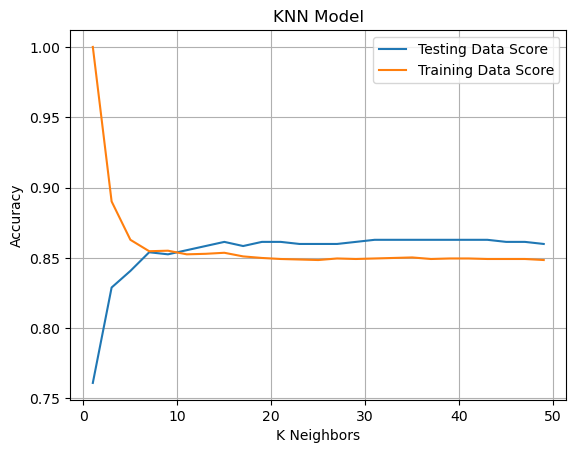

TN: 576
FP 9
FN 89
TP 4
[[  4  89]
 [  9 576]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
risk_factor = pd.read_csv("5.data_cardiovascular_risk.csv")
# print(risk_factor.head(10))
# print(risk_factor.tail(10))

# #資料簡介
# print(risk_factor.shape)
# print(risk_factor.info())


# #每個欄位字串空值的索引值位置判斷，皆沒有
# print("id:",risk_factor["id"][risk_factor["id"]==""].index)
# print("age:",risk_factor["age"][risk_factor["age"]==""].index)
# print("education:",risk_factor["education"][risk_factor["education"]==""].index)
# print("sex:",risk_factor["sex"][risk_factor["sex"]==""].index)
# print("is_smoking:",risk_factor["is_smoking"][risk_factor["is_smoking"]==""].index)
# print("cigsPerDay:",risk_factor["cigsPerDay"][risk_factor["cigsPerDay"]==""].index)
# print("BPMeds:",risk_factor["BPMeds"][risk_factor["BPMeds"]==""].index)
# print("prevalentStroke:",risk_factor["prevalentStroke"][risk_factor["prevalentStroke"]==""].index)
# print("prevalentHyp:",risk_factor["prevalentHyp"][risk_factor["prevalentHyp"]==""].index)
# print("diabetes:",risk_factor["diabetes"][risk_factor["diabetes"]==""].index)
# print("totChol:",risk_factor["totChol"][risk_factor["totChol"]==""].index)
# print("sysBP:",risk_factor["sysBP"][risk_factor["sysBP"]==""].index)
# print("diaBP:",risk_factor["diaBP"][risk_factor["diaBP"]==""].index)
# print("BMI:",risk_factor["BMI"][risk_factor["BMI"]==""].index)
# print("heartRate:",risk_factor["heartRate"][risk_factor["heartRate"]==""].index)
# print("glucose:",risk_factor["glucose"][risk_factor["glucose"]==""].index)
# print("TenYearCHD:",risk_factor["TenYearCHD"][risk_factor["TenYearCHD"]==""].index)

# #查看後有空值欄位的空值索引值位置判斷
# print("education:",risk_factor["education"][risk_factor["education"].isna()].index,sep="\n")
# print("cigsPerDay:",risk_factor["cigsPerDay"][risk_factor["cigsPerDay"].isna()].index,sep="\n")
# print("BPMeds:",risk_factor["BPMeds"][risk_factor["BPMeds"].isna()].index,sep="\n")
# print("totChol:",risk_factor["totChol"][risk_factor["totChol"].isna()].index,sep="\n")
# print("BMI:",risk_factor["BMI"][risk_factor["BMI"].isna()].index,sep="\n")
# print("heartRate:",risk_factor["heartRate"][risk_factor["heartRate"].isna()].index,sep="\n")
# print("glucose:",risk_factor["glucose"][risk_factor["glucose"].isna()].index,sep="\n")

# #各欄位的空值筆數判斷
# print("各欄位的空值筆數判斷",risk_factor.isna().sum())

# #查看相異值：dtype=object(是否有文字和數值同時存在或者單純只有文字)或dtype=float(是否有Nan存在，或是只有浮點數)
# #所有型態(object, float, int)都可以看有沒有雜訊(包含錯誤值、離群值)
# print("id:",risk_factor["id"].unique(),sep="\n") #[   0    1    2 ... 3387 3388 3389]
# print("age:",np.sort(risk_factor["age"].unique()),sep="\n")
# print("education:",np.sort(risk_factor["education"].unique()),sep="\n") #浮點數與nan
# print("sex:",np.sort(risk_factor["sex"].unique()),sep="\n") #['F' 'M']
# print("is_smoking:",np.sort(risk_factor["is_smoking"].unique()),sep="\n") #['YES' 'NO']
# print("cigsPerDay:",np.sort(risk_factor["cigsPerDay"].unique()),sep="\n") #浮點數與nan
# print("BPMeds:",np.sort(risk_factor["BPMeds"].unique()),sep="\n") #[ 0. nan  1.]
# print("prevalentStroke:",risk_factor["prevalentStroke"].unique(),sep="\n") #[0 1]
# print("prevalentHyp:",risk_factor["prevalentHyp"].unique(),sep="\n") #[0 1]
# print("diabetes:",risk_factor["diabetes"].unique(),sep="\n") #[0 1]
# print("totChol:",np.sort(risk_factor["totChol"].unique()),sep="\n") #浮點數與nan
# print("sysBP:",np.sort(risk_factor["sysBP"].unique()),sep="\n") #浮點數
# print("diaBP:",np.sort(risk_factor["diaBP"].unique()),sep="\n") #浮點數
# print("BMI:",list(np.sort(risk_factor["BMI"].unique())),sep="\n") #浮點數與nan
# print("heartRate:",np.sort(risk_factor["heartRate"].unique()),sep="\n") #浮點數與nan
# print("glucose:",np.sort(risk_factor["glucose"].unique()),sep="\n") #浮點數與nan
# print("TenYearCHD:",risk_factor["TenYearCHD"].unique(),sep="\n") #[0 1]
# for i in risk_factor.columns:
#     print("%s原始相異值:\n%s" %(i,np.sort(risk_factor[i].unique())))
#     print()
print("-"*50)


#處理空值，並且再次查看相異值
#education填入平均值
edu_mean = (risk_factor["education"][risk_factor["education"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["education"].isna(),"education"] = edu_mean
#print("education填入平均值後相異值:",np.sort(risk_factor["education"].unique()),sep="\n")

#cigsPerDay填入平均值
cigsPerDay_mean = (risk_factor["cigsPerDay"][risk_factor["cigsPerDay"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["cigsPerDay"].isna(),"cigsPerDay"] = cigsPerDay_mean
#print("\ncigsPerDay填入平均值後相異值:",np.sort(risk_factor["cigsPerDay"].unique()),sep="\n")

#BPMeds(是否正在服用降血壓藥物)填入眾數
risk_factor["BPMeds"].value_counts()  # 數值為0.0-->有3246筆, 數值為1.0-->有100筆
risk_factor.loc[risk_factor["BPMeds"].isna(),"BPMeds"] = 0.0 #填入眾數0.0
#print("\nBPMeds填入眾數後相異值:",risk_factor["BPMeds"].unique(),sep="\n")

#totChol填入平均值，平均值為237.07
totChol_mean = (risk_factor["totChol"][risk_factor["totChol"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["totChol"].isna(),"totChol"] = totChol_mean
#print("\ntotChol填入平均值後相異值:",np.sort(risk_factor["totChol"].unique()),sep="\n")

#BMI:填入平均值，平均值為25.79
BMI_mean = (risk_factor["BMI"][risk_factor["BMI"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["BMI"].isna(),"BMI"] = BMI_mean
#print("\nBMI填入平均值後相異值:",np.sort(risk_factor["BMI"].unique()),sep="\n")

#heartRate:填入平均值，平均值為75.98
heartRate_mean = (risk_factor["heartRate"][risk_factor["heartRate"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["heartRate"].isna(),"heartRate"] = heartRate_mean
#print("\nheartRate填入平均值後相異值:",np.sort(risk_factor["heartRate"].unique()),sep="\n")

#glucose:填入平均值，平均值為82.09
glucose_mean = (risk_factor["glucose"][risk_factor["glucose"].isna()==False].mean()).round(2)
risk_factor.loc[risk_factor["glucose"].isna(),"glucose"] = glucose_mean
#print("\nglucose填入平均值後相異值:",np.sort(risk_factor["glucose"].unique()),sep="\n")
print("-"*50)



#age欄位做zscore
risk_factor["age"] = (risk_factor["age"]-risk_factor["age"].mean())/risk_factor["age"].std()

#cigsPerDay欄位做極值正規化
risk_factor["cigsPerDay"] = (risk_factor["cigsPerDay"]-risk_factor["cigsPerDay"].min())/(risk_factor["cigsPerDay"].max()-risk_factor["cigsPerDay"].min())
print("-"*50)



#資料型態轉換_map，刪除id及TenYearCHD欄位
sex_map = {"M":1,"F":2}
is_smoking_map = {"NO":0,"YES":1}


risk_factor["sex"] = risk_factor["sex"].map(sex_map)
risk_factor["is_smoking"] = risk_factor["is_smoking"].map(is_smoking_map)

fisk_factor_copy  =risk_factor.copy()

x = risk_factor.drop(["id","TenYearCHD"], axis=1)
y = risk_factor["TenYearCHD"]

# print(risk_factor.corr()) #看資料前處理完成後的 df中各欄位相關係數


#進行KNN Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# print("x_train:",x_train,sep = "\n")
# print("x_test:",x_test,sep = "\n")
# print("y_train:",y_train,sep = "\n")
# print("y_test:",y_test,sep = "\n")

#使用GridSearchCV搜尋K value最佳解
Turning_parameters = {"n_neighbors":range(1,51,2)}
Turning_KNN = GridSearchCV(KNeighborsClassifier(),Turning_parameters)
Turning_KNN.fit(x_train, y_train)
print("Turning_KNN.best_params_ = ",Turning_KNN.best_params_)
print("Turning_KNN.score = ",Turning_KNN.score(x_test,y_test))

#建KNN模型然後做預測
knn_model = KNeighborsClassifier(Turning_KNN.best_params_["n_neighbors"])
knn_model.fit(x_train, y_train)
prediction = knn_model.predict(x_test)
#print(prediction)
print("knn_model.score = ",knn_model.score(x_train,y_train))
print("-"*50)

#使用Confusion Matrix評估建立的模型
print("precision_score=",metrics.precision_score(y_test, prediction))
print("recall_score=",metrics.recall_score(y_test, prediction))
print("f1_score=",metrics.f1_score(y_test, prediction))
print("-"*50)

#繪製折線圖，看train,test的accuracy關係
Train_Accuracy = list()
Test_Accuracy = list()
for i in range(1,51,2):
    KNN_Practice = KNeighborsClassifier(i)
    KNN_Practice.fit(x_train,y_train)
    Train_Accuracy.append(KNN_Practice.score(x_train,y_train))
    Test_Accuracy.append(KNN_Practice.score(x_test,y_test))
# print("Train_Accuracy",Train_Accuracy)
# print("Test_Accuracy",Test_Accuracy)

plt.plot(range(1, 51, 2), Test_Accuracy, label='Testing Data Score')
plt.plot(range(1, 51, 2), Train_Accuracy, label='Training Data Score') #plt.plot(x軸,y軸,label)
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model')
plt.legend()
plt.grid() #畫格線
plt.show()

cm = confusion_matrix(y_test,prediction)
tn, fp ,fn ,tp = cm.flatten()
print('TN:',tn)
print('FP',fp)
print('FN',fn)
print('TP',tp)
print(np.array([[tp,fn],[fp,tn]]))

## 相關係數

Axes(0.1675,0.11;0.5775x0.77)
id                 0.009866
age                0.224927
education         -0.052074
sex               -0.084647
is_smoking         0.034143
cigsPerDay         0.066686
BPMeds             0.087349
prevalentStroke    0.068627
prevalentHyp       0.166544
diabetes           0.103681
totChol            0.093679
sysBP              0.212703
diaBP              0.135979
BMI                0.066538
heartRate          0.020224
glucose            0.132648
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1.682535,2.0,2,1,0.042857,0.0,0,0,0,241.774,179.080,96.90,27.51793,91.80,90.4000,1
1,1,-1.575978,4.0,1,0,0.000000,0.0,0,1,0,231.928,203.280,111.72,31.76459,73.44,84.7500,0
2,2,-0.412223,1.0,2,1,0.142857,0.0,0,0,0,273.500,140.360,80.94,21.71345,89.76,106.2200,0
3,3,0.053279,1.0,1,1,0.285714,0.0,0,1,0,254.902,191.180,100.32,30.15342,69.36,106.2200,1
4,4,1.682535,1.0,2,1,0.428571,0.0,0,0,0,263.654,165.165,96.90,28.19014,71.40,87.0100,0
5,5,1.333409,3.0,2,0,0.000000,0.0,0,1,0,297.568,220.220,137.94,34.99760,86.70,73.4500,1
6,6,1.333409,1.0,1,0,0.000000,0.0,0,1,0,260.372,280.720,155.04,26.49361,76.50,89.2700,0
7,7,-1.575978,4.0,1,1,0.500000,0.0,0,0,0,322.730,123.420,77.52,30.03605,61.20,71.1900,0
8,8,-0.994100,2.0,2,1,0.285714,0.0,0,0,0,240.680,152.460,88.92,22.08690,87.72,89.2700,0
9,9,0.635156,2.0,2,0,0.000000,0.0,0,1,0,356.644,174.240,92.34,27.43257,86.70,92.7617,0


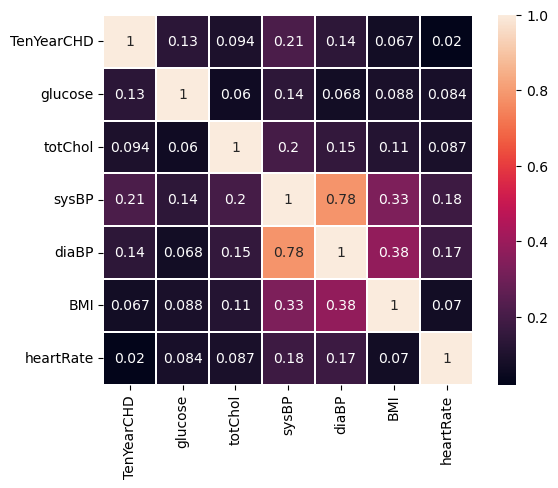

In [2]:
#查看TenYearCHD欄位與其他生理數值欄位的相關係數，並且乘上相關係數

import seaborn as sns
corr_df = risk_factor[["TenYearCHD","glucose","totChol","sysBP","diaBP","BMI","heartRate"]].corr()
print(sns.heatmap(corr_df,linewidths =0.1,vmax =1.0,square = True,annot=True))
print(risk_factor.corr()['TenYearCHD'])
fisk_factor_copy['totChol'] = fisk_factor_copy['totChol']*1.094
fisk_factor_copy['sysBP'] = fisk_factor_copy['sysBP']*1.21
fisk_factor_copy['diaBP'] = fisk_factor_copy['diaBP']*1.14
fisk_factor_copy['BMI'] = fisk_factor_copy['BMI']*1.067
fisk_factor_copy['heartRate'] = fisk_factor_copy['heartRate']*1.02
fisk_factor_copy['glucose'] = fisk_factor_copy['glucose']*1.13
fisk_factor_copy.head(10)

Turning_KNN.best_params_ =  {'n_neighbors': 15}
Turning_KNN.score =  0.831858407079646
knn_model.score =  0.831858407079646
--------------------------------------------------
precision_score= 0.3333333333333333
recall_score= 0.02702702702702703
f1_score= 0.05
--------------------------------------------------


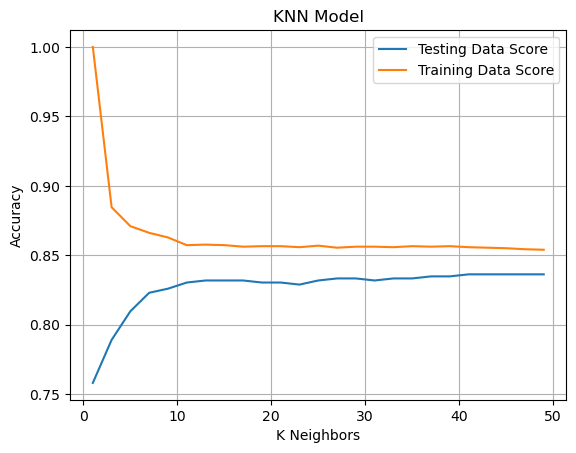

In [10]:
#乘上先關係數後，再次建KNN模型

x = fisk_factor_copy.drop(["id","TenYearCHD"], axis=1)
y = fisk_factor_copy["TenYearCHD"]
#進行KNN Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
# print("x_train:",x_train,sep = "\n")
# print("x_test:",x_test,sep = "\n")
# print("y_train:",y_train,sep = "\n")
# print("y_test:",y_test,sep = "\n")

#使用GridSearchCV搜尋K value最佳解
Turning_parameters = {"n_neighbors":range(1,51,2)}
Turning_KNN = GridSearchCV(KNeighborsClassifier(),Turning_parameters)
Turning_KNN.fit(x_train, y_train)
print("Turning_KNN.best_params_ = ",Turning_KNN.best_params_)
print("Turning_KNN.score = ",Turning_KNN.score(x_test,y_test))

#建KNN模型然後做預測
knn_model = KNeighborsClassifier(Turning_KNN.best_params_["n_neighbors"])
knn_model.fit(x_train, y_train)
prediction = knn_model.predict(x_test)
#print(prediction)
print("knn_model.score = ",knn_model.score(x_test,y_test))
print("-"*50)

#使用Confusion Matrix評估建立的模型
print("precision_score=",metrics.precision_score(y_test, prediction))
print("recall_score=",metrics.recall_score(y_test, prediction))
print("f1_score=",metrics.f1_score(y_test, prediction))
print("-"*50)

#繪製折線圖，看train,test的accuracy關係
Train_Accuracy = list()
Test_Accuracy = list()
for i in range(1,51,2):
    KNN_Practice = KNeighborsClassifier(i)
    KNN_Practice.fit(x_train,y_train)
    Train_Accuracy.append(KNN_Practice.score(x_train,y_train))
    Test_Accuracy.append(KNN_Practice.score(x_test,y_test))
# print("Train_Accuracy",Train_Accuracy)
# print("Test_Accuracy",Test_Accuracy)

plt.plot(range(1, 51, 2), Test_Accuracy, label='Testing Data Score')
plt.plot(range(1, 51, 2), Train_Accuracy, label='Training Data Score') #plt.plot(x軸,y軸,label)
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Model')
plt.legend()
plt.grid() #畫格線
plt.show()


In [11]:
#查看confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,prediction)
tn, fp ,fn ,tp = cm.flatten()
print('TN:',tn)
print('FP',fp)
print('FN',fn)
print('TP',tp)
print(np.array([[tp,fn],[fp,tn]]))

TN: 561
FP 6
FN 108
TP 3
[[  3 108]
 [  6 561]]
